In [ ]:
import json 
from IPython.display import display


# Upload your game log !

In [ ]:
#to use locally 
#gameLogFile = open("../logs/gameLog.json")
from google.colab import files
uploaded = files.upload()
gameLogFile = open("gameLog.json")


gameLog = json.load(gameLogFile)

Saving gameLog.json to gameLog (3).json


# Setup

In [ ]:
gameLog["turns"][:4]

[{'currentCar': '1',
  'cars': ['0', '1', '2'],
  'balance': [17500, 17488, 17500],
  'speed': [0, 1, 0],
  'y': [0, 1, 0],
  'shield': [0, 0, 0],
  'bananas': [],
  'costs': [10, 992, 1680, 992, 744],
  'bought': [1, 0, 0, 0, 0],
  'usedAbilities': [1, 0, 0, 0, 0]},
 {'currentCar': '2',
  'cars': ['0', '1', '2'],
  'balance': [17500, 17488, 17490],
  'speed': [0, 1, 1],
  'y': [0, 2, 1],
  'shield': [0, 0, 0],
  'bananas': [],
  'costs': [8, 664, 1092, 664, 498],
  'bought': [2, 0, 0, 0, 0],
  'usedAbilities': [1, 0, 0, 0, 0]},
 {'currentCar': '0',
  'cars': ['0', '1', '2'],
  'balance': [16984, 17488, 17490],
  'speed': [2, 1, 1],
  'y': [2, 3, 2],
  'shield': [1, 0, 0],
  'bananas': [],
  'costs': [8, 445, 710, 445, 2474],
  'bought': [4, 0, 0, 0, 1],
  'usedAbilities': [2, 0, 0, 0, 1]},
 {'currentCar': '1',
  'cars': ['0', '1', '2'],
  'balance': [16984, 17480, 17490],
  'speed': [2, 2, 1],
  'y': [4, 5, 3],
  'shield': [0, 0, 0],
  'bananas': [],
  'costs': [6, 298, 461, 298, 1658

In [ ]:
# [x['usedAbilities'] for x in gameLog["turns"] ] 

In [ ]:
# [x['bought'] for x in gameLog["turns"] ] 

In [ ]:
ACTIONS= {
    "ACCELERATE" : 0,
    "SHELL": 1,
    "SUPER_SHELL": 2,
    "BANANA": 3,
    "SHIELD": 4
}


def populatePosition(positions, turn):
    for i in range(0,3) :
        positions[i].append(turn['y'][i])
        speed[i].append(turn['speed'][i])
        balance[i].append(turn['balance'][i])
        shield[i].append(turn['y'][i] if turn['shield'][i] == 1 else turn['shield'][i])
    

 
    bananas.append(turn['bananas'])

    for i in range(0,len(ACTIONS.keys())) :
        bought[i].append(turn['bought'][i])
        usedAbilities[i].append(turn['usedAbilities'][i])
        costs[i].append(turn['costs'][i])

        
positions = [[],[],[]]
speed = [[],[],[]]
balance = [[],[],[]]
shield = [[],[],[]]

bananas = []

bought = [[],[],[],[],[]]
usedAbilities = [[],[],[],[],[]]
costs = [[],[],[],[],[]]


for turn in gameLog["turns"] :
     populatePosition(positions, turn)


# Single plots

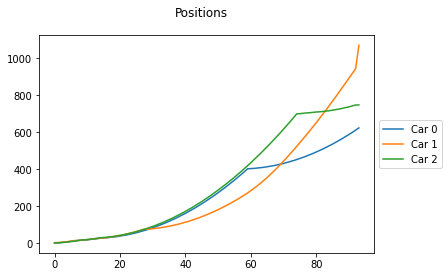

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
fig.suptitle('Positions')



x = list(range(0, len(positions[0])))
for i in range(0,3) :
    ax.plot(x, positions[i],  label=('Car {car}'.format( car=i)))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

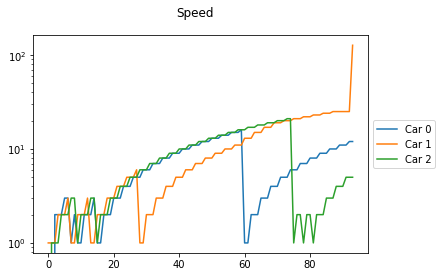

In [ ]:
fig,ax=plt.subplots()
fig.suptitle('Speed')
ax.set_yscale('log')


x = list(range(0, len(speed[0])))
for i in range(0,3) :
    ax.plot(x, speed[i],  label=('Car {car}'.format( car=i)))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

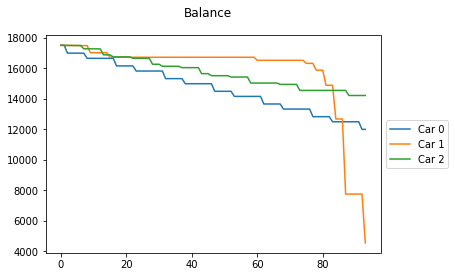

In [ ]:
fig,ax=plt.subplots()
fig.suptitle('Balance')

x = list(range(0, len(speed[0])))
for i in range(0,3) :
    ax.plot(x, balance[i],  label=('Car {car}'.format( car=i)))


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

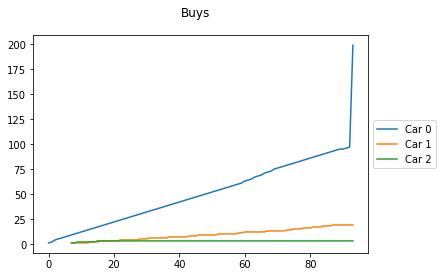

In [ ]:
fig,ax=plt.subplots()
fig.suptitle('Buys')

x = list(range(0, len(speed[0])))
for i in range(0,3) :
    ax.plot(x, list(map(lambda x: None if x == 0 else x, bought[i])), label=('Car {car}'.format( car=i)))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

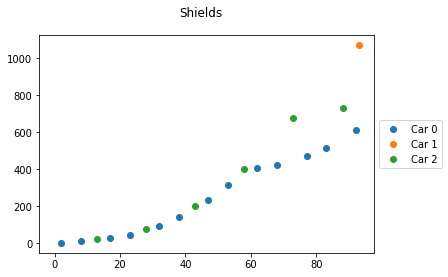

In [ ]:
fig,ax=plt.subplots()
fig.suptitle('Shields')

x = list(range(0, len(shield[0])))
for i in range(0,3) :
    ax.scatter(x, list(map(lambda x: None if x == 0 else x, shield[i])), label=('Car {car}'.format( car=i)))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

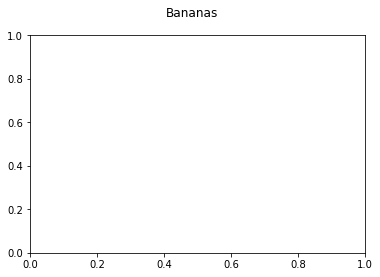

In [ ]:
fig,ax=plt.subplots()
fig.suptitle('Bananas')


for i in range(0,len(bananas)) :
    if len(bananas[i]) != 0:
        for xe, ye in zip([i], (bananas[i])):
            plt.scatter([xe] * len(ye), ye)
            

plt.show()

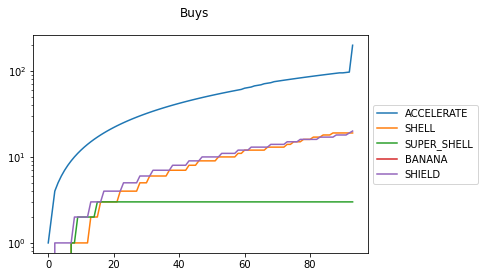

In [ ]:
fig,ax=plt.subplots()
fig.suptitle('Buys')

x = list(range(0, len(positions[0])))
for i in range(0,5) :
    ax.set_yscale('log')
    ax.plot(x, bought[i], label=('{buy}'.format( buy=list(ACTIONS.keys())[list(ACTIONS.values()).index(i)])))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

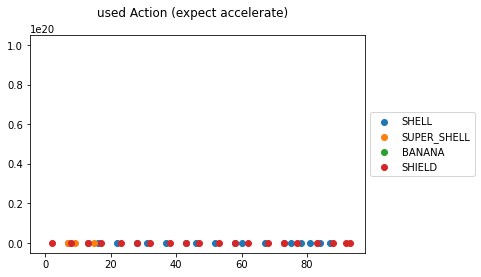

In [ ]:
fig,ax=plt.subplots()
fig.suptitle('used Action (expect accelerate)')


x = list(range(0, len(positions[0])))
for i in range(1,5) :
 
    ax.scatter(x, list(map(lambda x: None if x == 0 else x, usedAbilities[i])), label=('{action}'.format( action=list(ACTIONS.keys())[list(ACTIONS.values()).index(i)])))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

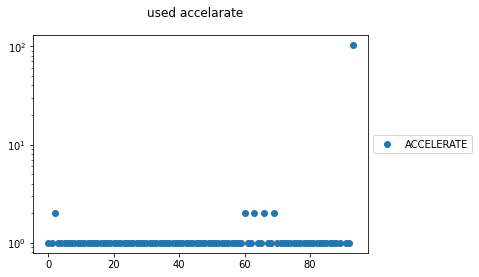

In [ ]:
fig,ax=plt.subplots()
fig.suptitle('used accelarate')

ax.set_yscale('log')


x = list(range(0, len(positions[0])))
for i in [0] :
 
    ax.scatter(x, list(map(lambda x: None if x == 0 else x, usedAbilities[i])), label=('{action}'.format( action=list(ACTIONS.keys())[list(ACTIONS.values()).index(i)])))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

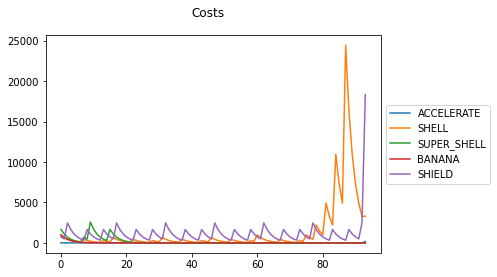

In [ ]:
fig,ax=plt.subplots()
fig.suptitle('Costs')


x = list(range(0, len(positions[0])))
for i in range(0,5) :
 
    ax.plot(x, costs[i], label=('{action}'.format( action=list(ACTIONS.keys())[list(ACTIONS.values()).index(i)])))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Subplots (ticks on x)

Text(0.5, 1.0, 'Costs')

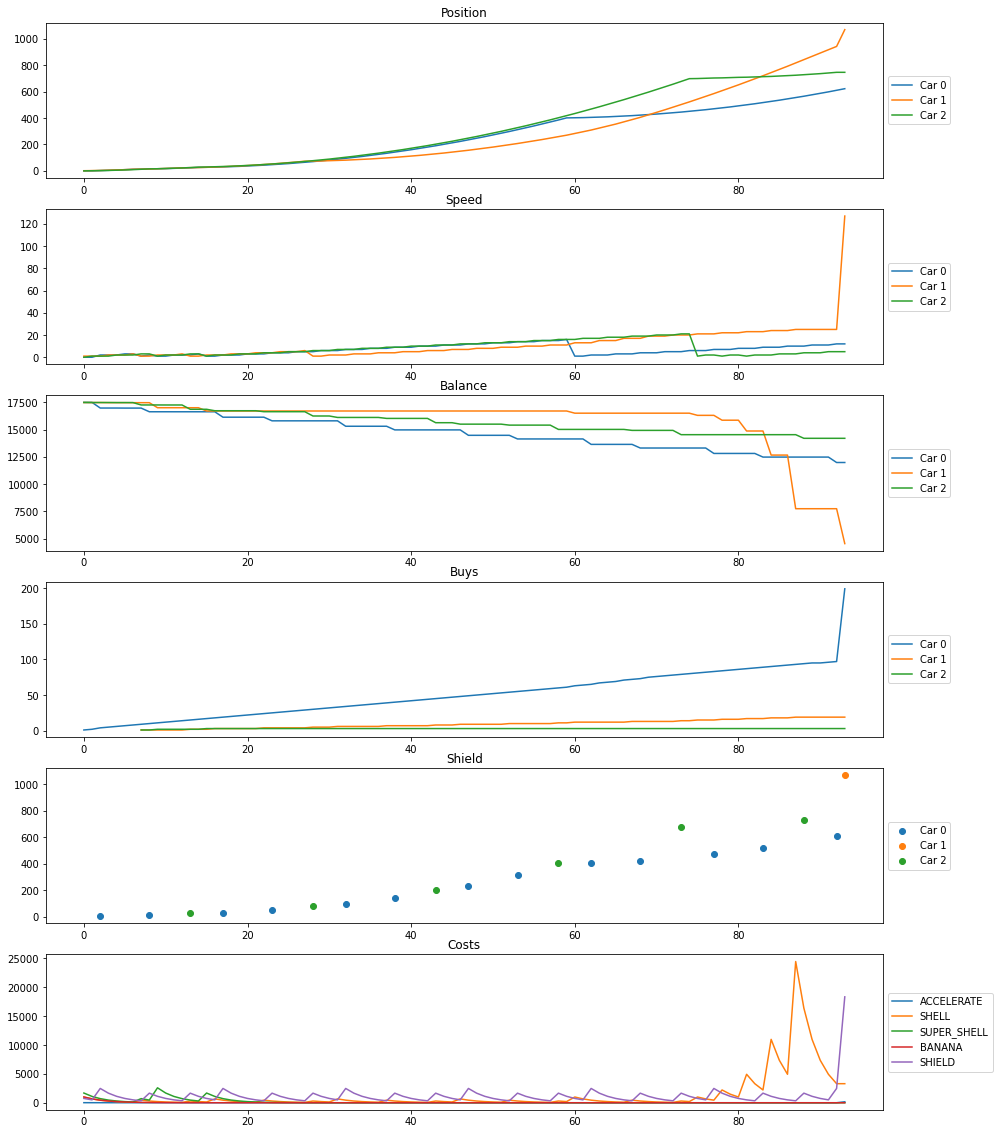

In [ ]:
figure, axis = plt.subplots(6,1, figsize=(15,20))

# For Position Function
x = list(range(0, len(positions[0])))
for i in range(0,3) :
    axis[0].plot( x, positions[i],  label=('Car {car}'.format( car=i)))
axis[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[0].set_title("Position")
  
# For Speed Function
x = list(range(0, len(speed[0])))
for i in range(0,3) :
    axis[1].plot(x,speed[i], label=('Car {car}'.format( car=i)))
axis[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[1].set_title("Speed")
  
x = list(range(0, len(speed[0])))
for i in range(0,3) :
    axis[2].plot(x, balance[i],  label=('Car {car}'.format( car=i)))
axis[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[2].set_title("Balance")
  
x = list(range(0, len(speed[0])))
for i in range(0,3) :
    axis[3].plot(x, list(map(lambda x: None if x == 0 else x, bought[i])), label=('Car {car}'.format( car=i)))
    axis[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[3].set_title("Buys")

x = list(range(0, len(shield[0])))
for i in range(0,3) :
    axis[4].scatter(x, list(map(lambda x: None if x == 0 else x, shield[i])), label=('Car {car}'.format( car=i)))

axis[4].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[4].set_title("Shield")

x = list(range(0, len(positions[0])))
for i in range(0,5) :
 
    axis[5].plot(x, costs[i], label=('{action}'.format( action=list(ACTIONS.keys())[list(ACTIONS.values()).index(i)])))

axis[5].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[5].set_title("Costs")

# Subplots (ticks on y)

Text(0.5, 1.0, 'Costs')

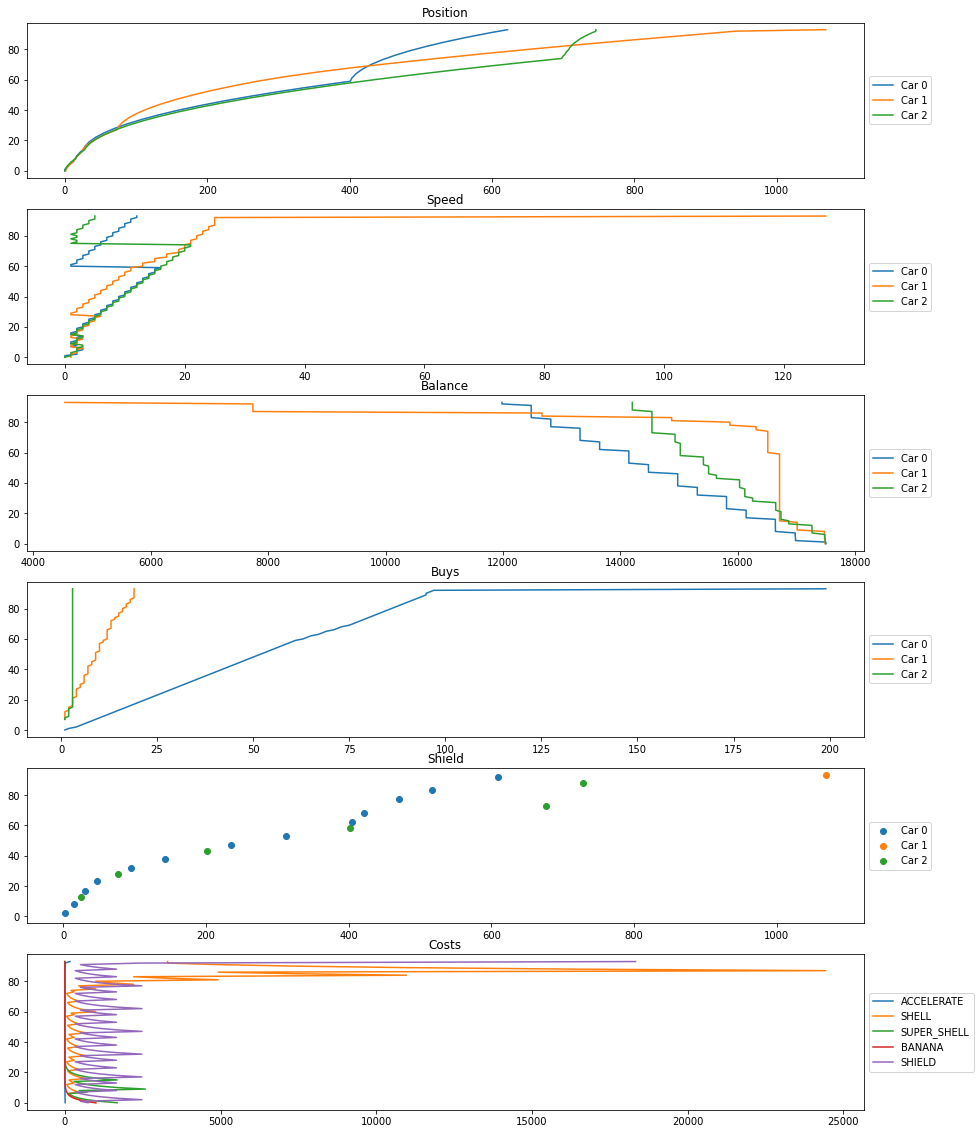

In [ ]:
figure, axis = plt.subplots(6,1, figsize=(15,20))

# For Position Function
x = list(range(0, len(positions[0])))
for i in range(0,3) :
    axis[0].plot( positions[i], x, label=('Car {car}'.format( car=i)))
axis[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[0].set_title("Position")
  
# For Speed Function
x = list(range(0, len(speed[0])))
for i in range(0,3) :
    axis[1].plot(speed[i],x, label=('Car {car}'.format( car=i)))
axis[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[1].set_title("Speed")
  
x = list(range(0, len(speed[0])))
for i in range(0,3) :
    axis[2].plot( balance[i], x, label=('Car {car}'.format( car=i)))
axis[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[2].set_title("Balance")
  
x = list(range(0, len(speed[0])))
for i in range(0,3) :
    axis[3].plot( list(map(lambda x: None if x == 0 else x, bought[i])),x, label=('Car {car}'.format( car=i)))
    axis[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[3].set_title("Buys")

x = list(range(0, len(shield[0])))
for i in range(0,3) :
    axis[4].scatter(list(map(lambda x: None if x == 0 else x, shield[i])),x, label=('Car {car}'.format( car=i)))

axis[4].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[4].set_title("Shield")

x = list(range(0, len(positions[0])))
for i in range(0,5) :
 
    axis[5].plot( costs[i],x, label=('{action}'.format( action=list(ACTIONS.keys())[list(ACTIONS.values()).index(i)])))

axis[5].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axis[5].set_title("Costs")

# Tables (with pandas)

## Setup

In [ ]:
ACTIONS= {
    "ACCELERATE" : 0,
    "SHELL": 1,
    "SUPER_SHELL": 2,
    "BANANA": 3,
    "SHIELD": 4
}


#def populatePosition(positions, turn):
#    for i in range(0,3) :
#        positions[i].append(turn['y'][i])
#        speed[i].append(turn['speed'][i])
#        balance[i].append(turn['balance'][i])
#        shield[i].append(turn['y'][i] if turn['shield'][i] == 1 else turn['shield'][i])
#    
#
# 
#    bananas.append(turn['bananas'])
#
#    for i in range(0,len(ACTIONS.keys())) :
#        bought[i].append(turn['bought'][i])
#        usedAbilities[i].append(turn['usedAbilities'][i])
#        costs[i].append(turn['costs'][i])

#{'currentCar': '1',
#  'cars': ['0', '1', '2'],
#  'balance': [17500, 17488, 17500],
#  'speed': [0, 1, 0],
#  'y': [0, 1, 0],
#  'shield': [0, 0, 0],
#  'bananas': [],
#  'costs': [10, 992, 1680, 992, 744],
#  'bought': [1, 0, 0, 0, 0],
#  'usedAbilities': [1, 0, 0, 0, 0]},
# {'currentCar': '2',
#  'cars': ['0', '1', '2'],
#  'balance': [17500, 17488, 17490],        



In [ ]:
turns = gameLog["turns"]
def treatTurn(turn):
  currentCar = turn["currentCar"]
  position0 = turn["y"][0] 
  position1 = turn["y"][1] 
  position2 = turn["y"][2] 
  speed0 = turn["speed"][0] 
  speed1 = turn["speed"][1]
  speed2 = turn["speed"][2]
  balance0 = turn["balance"][0]
  balance1 =  turn["balance"][1]
  balance2 =  turn["balance"][2]
  boughtShield0 =  turn["bought"][ACTIONS["SHIELD"]] if turn["currentCar"] == '0' else None
  boughtShield1 =   turn["bought"][ACTIONS["SHIELD"]] if turn["currentCar"] == '1' else None
  boughtShield2 =  turn["bought"][ACTIONS["SHIELD"]] if turn["currentCar"] == '2' else None
  boughtAccelerate0 =  turn["bought"][ACTIONS["ACCELERATE"]] if turn["currentCar"] == '0' else None
  boughtAccelerate1 =   turn["bought"][ACTIONS["ACCELERATE"]] if turn["currentCar"] == '1' else None
  boughtAccelerate2 =  turn["bought"][ACTIONS["ACCELERATE"]] if turn["currentCar"] == '2' else None
  boughtShell0 =  turn["bought"][ACTIONS["SHELL"]] if turn["currentCar"] == '0' else None
  boughtShell1 =  turn["bought"][ACTIONS["SHELL"]] if turn["currentCar"] == '1' else None
  boughtShell2 =  turn["bought"][ACTIONS["SHELL"]] if turn["currentCar"] == '2' else None
  boughtSuper_shell0 =  turn["bought"][ACTIONS["SUPER_SHELL"]] if turn["currentCar"] == '0' else None
  boughtSuper_shell1 = turn["bought"][ACTIONS["SUPER_SHELL"]] if turn["currentCar"] == '1' else None
  boughtSuper_shell2 = turn["bought"][ACTIONS["SUPER_SHELL"]] if turn["currentCar"] == '2' else None
  boughtBanana0 = turn["bought"][ACTIONS["BANANA"]] if turn["currentCar"] == '0' else None
  boughtBanana1 = turn["bought"][ACTIONS["BANANA"]] if turn["currentCar"] == '1' else None
  boughtBanana2 = turn["bought"][ACTIONS["BANANA"]] if turn["currentCar"] == '2' else None
  usedShield0 =  turn["usedAbilities"][ACTIONS["SHIELD"]] if turn["currentCar"] == '1' else None
  usedShield1 =  turn["usedAbilities"][ACTIONS["SHIELD"]] if turn["currentCar"] == '1' else None
  usedShield2 =  turn["usedAbilities"][ACTIONS["SHIELD"]] if turn["currentCar"] == '2' else None
  usedAccelerate0 =  turn["usedAbilities"][ACTIONS["ACCELERATE"]] if turn["currentCar"] == '0' else None
  usedAccelerate1 =  turn["usedAbilities"][ACTIONS["ACCELERATE"]] if turn["currentCar"] == '1' else None
  usedAccelerate2 =  turn["usedAbilities"][ACTIONS["ACCELERATE"]] if turn["currentCar"] == '2' else None
  usedShell0 = turn["usedAbilities"][ACTIONS["SHELL"]] if turn["currentCar"] == '0' else None
  usedShell1 = turn["usedAbilities"][ACTIONS["SHELL"]] if turn["currentCar"] == '1' else None
  usedShell2 = turn["usedAbilities"][ACTIONS["SHELL"]] if turn["currentCar"] == '2' else None
  usedSuper_shell0 = turn["usedAbilities"][ACTIONS["SUPER_SHELL"]] if turn["currentCar"] == '0' else None
  usedSuper_shell1 = turn["usedAbilities"][ACTIONS["SUPER_SHELL"]] if turn["currentCar"] == '1' else None
  usedSuper_shell2 = turn["usedAbilities"][ACTIONS["SUPER_SHELL"]] if turn["currentCar"] == '2' else None
  usedBanana0 = turn["usedAbilities"][ACTIONS["BANANA"]] if turn["currentCar"] == '0' else None
  usedBanana1 = turn["usedAbilities"][ACTIONS["BANANA"]] if turn["currentCar"] == '1' else None
  usedBanana2 = turn["usedAbilities"][ACTIONS["BANANA"]] if turn["currentCar"] == '2' else None
  CostAccelerate = turn["costs"][ACTIONS["ACCELERATE"]] 
  CostShell = turn["costs"][ACTIONS["SHELL"]] 
  CostSuper_shell = turn["costs"][ACTIONS["SUPER_SHELL"]] 
  CostBanana = turn["costs"][ACTIONS["BANANA"]]
  CostShield =  turn["costs"][ACTIONS["SHIELD"]]

  return [currentCar, position0, position1, position2, speed0
                          ,speed1, speed2, balance0, balance1, balance2
                          , boughtShield0, boughtShield1, boughtShield2
                          , boughtAccelerate0, boughtAccelerate1, boughtAccelerate2
                          , boughtShell0, boughtShell1, boughtShell2
                          , boughtSuper_shell0, boughtSuper_shell1, boughtSuper_shell2
                          , boughtBanana0, boughtBanana1, boughtBanana2
                          , usedShield0, usedShield1, usedShield2
                          , usedAccelerate0, usedAccelerate1, usedAccelerate2
                          , usedShell0, usedShell1, usedShell2
                          , usedSuper_shell0, usedSuper_shell1, usedSuper_shell2
                          , usedBanana0, usedBanana1, usedBanana2
                          , CostAccelerate
                          , CostShell
                          , CostSuper_shell
                          , CostBanana
                          , CostShield]
                        
    
treatedTurns = map(lambda turn: treatTurn(turn), turns)

In [ ]:
# Importing Pandas to create DataFrame
import pandas as pd


  
# Creating Empty DataFrame and Storing it in variable df
df = pd.DataFrame(treatedTurns, columns=['currentCar','position0', 'position1', 'position2', 'speed0'
                          ,'speed1', 'speed2', 'balance0', 'balance1', 'balance2'
                          , 'boughtShield0', 'boughtShield1', 'boughtShield2'
                          , 'boughtAccelerate0', 'boughtAccelerate1', 'boughtAccelerate2'
                          , 'boughtShell0', 'boughtShell1', 'boughtShell2'
                          , 'boughtSuper_Shell0', 'boughtSuper_Shell1', 'boughtSuper_Shell2'
                          , 'boughtBanana0', 'boughtBanana1', 'boughtBanana2'
                          , 'usedAccelerate0', 'usedAccelerate1', 'usedAccelerate2'
                          , 'usedAccelerate0', 'usedAccelerate1', 'usedAccelerate2'
                          , 'usedShell0', 'usedShell1', 'usedShell2'
                          , 'usedSuper_Shell0', 'usedSuper_Shell1', 'usedSuper_Shell2'
                          , 'usedBanana0', 'usedBanana1', 'usedBanana2'
                          , 'costAccelerate'
                          , 'costShell'
                          , 'costSuper_shell'
                          , 'costBanana'
                          , 'costShield'] )
                        

In [ ]:
df


,currentCar,position0,position1,position2,speed0,speed1,speed2,balance0,balance1,balance2,...,usedSuper_Shell1,usedSuper_Shell2,usedBanana0,usedBanana1,usedBanana2,costAccelerate,costShell,costSuper_shell,costBanana,costShield
0,1,0,1,0,0,1,0,17500,17488,17500,...,0.0,NaN,NaN,0.0,NaN,10,992,1680,992,744
1,2,0,2,1,0,1,1,17500,17488,17490,...,NaN,0.0,NaN,NaN,0.0,8,664,1092,664,498
2,0,2,3,2,2,1,1,16984,17488,17490,...,NaN,NaN,0.0,NaN,NaN,8,445,710,445,2474
3,1,4,5,3,2,2,1,16984,17480,17490,...,0.0,NaN,NaN,0.0,NaN,6,298,461,298,1658
4,2,6,7,5,2,2,2,16984,17480,17484,...,NaN,0.0,NaN,NaN,0.0,5,200,300,200,1111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0,576,867,732,11,25,4,12481,7740,14204,...,NaN,NaN,0.0,NaN,NaN,0,10971,0,0,1111
90,1,587,892,736,11,25,4,12481,7740,14204,...,0.0,NaN,NaN,0.0,NaN,0,7351,0,0,744
91,2,598,917,741,11,25,5,12481,7740,14204,...,NaN,0.0,NaN,NaN,0.0,0,4925,0,0,498
92,0,610,942,746,12,25,5,11983,7740,14204,...,NaN,NaN,0.0,NaN,NaN,0,3299,0,0,2474


# Table filtering examples 

In [ ]:
df.filter(regex=("bought\w*0$"))

,boughtShield0,boughtAccelerate0,boughtShell0,boughtSuper_Shell0,boughtBanana0
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,1.0,4.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
89,18.0,95.0,19.0,3.0,0.0
90,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
92,19.0,97.0,19.0,3.0,0.0


In [ ]:
df.filter(regex=("\w*Shell\w*"))

,boughtShell0,boughtShell1,boughtShell2,boughtSuper_Shell0,boughtSuper_Shell1,boughtSuper_Shell2,usedShell0,usedShell1,usedShell2,usedSuper_Shell0,usedSuper_Shell1,usedSuper_Shell2,costShell
0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,992
1,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,664
2,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,445
3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,298
4,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,19.0,NaN,NaN,3.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,10971
90,NaN,19.0,NaN,NaN,3.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,7351
91,NaN,NaN,19.0,NaN,NaN,3.0,NaN,NaN,0.0,NaN,NaN,0.0,4925
92,19.0,NaN,NaN,3.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,3299


In [ ]:

filteredBoughtShell = df.filter(regex=("(bought|cost)Shell\w*")).replace(0, np.nan).dropna(thresh=2)

display(filteredBoughtShell)


,boughtShell0,boughtShell1,boughtShell2,costShell
7,NaN,NaN,1.0,445
8,1.0,NaN,NaN,298
9,NaN,1.0,NaN,200
10,NaN,NaN,1.0,133
11,1.0,NaN,NaN,89
...,...,...,...,...
89,19.0,NaN,NaN,10971
90,NaN,19.0,NaN,7351
91,NaN,NaN,19.0,4925
92,19.0,NaN,NaN,3299


In [ ]:
display(df)

,currentCar,position0,position1,position2,speed0,speed1,speed2,balance0,balance1,balance2,...,usedSuper_Shell1,usedSuper_Shell2,usedBanana0,usedBanana1,usedBanana2,costAccelerate,costShell,costSuper_shell,costBanana,costShield
0,1,0,1,0,0,1,0,17500,17488,17500,...,0.0,NaN,NaN,0.0,NaN,10,992,1680,992,744
1,2,0,2,1,0,1,1,17500,17488,17490,...,NaN,0.0,NaN,NaN,0.0,8,664,1092,664,498
2,0,2,3,2,2,1,1,16984,17488,17490,...,NaN,NaN,0.0,NaN,NaN,8,445,710,445,2474
3,1,4,5,3,2,2,1,16984,17480,17490,...,0.0,NaN,NaN,0.0,NaN,6,298,461,298,1658
4,2,6,7,5,2,2,2,16984,17480,17484,...,NaN,0.0,NaN,NaN,0.0,5,200,300,200,1111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0,576,867,732,11,25,4,12481,7740,14204,...,NaN,NaN,0.0,NaN,NaN,0,10971,0,0,1111
90,1,587,892,736,11,25,4,12481,7740,14204,...,0.0,NaN,NaN,0.0,NaN,0,7351,0,0,744
91,2,598,917,741,11,25,5,12481,7740,14204,...,NaN,0.0,NaN,NaN,0.0,0,4925,0,0,498
92,0,610,942,746,12,25,5,11983,7740,14204,...,NaN,NaN,0.0,NaN,NaN,0,3299,0,0,2474
